# Visualizing pixel-wise mixup in feature dimension
<br>
used data: <b>cifar-10</b> automobile and truck data <br>
used model: pretrained on above two classes, <b>mobilenet_v3</b> <br>
control mixup interpolant lambda in [0, 1], set step size to 0.01 <br>
<code>Chung, Mar 28, 2021</code>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image
# from tqdm import tqdm

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [3]:
truck_tensor = transform(Image.open('truck.png')).unsqueeze(0)
auto_tensor = transform(Image.open('automobile.png')).unsqueeze(0)

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

### Experiment 1. applied on training images

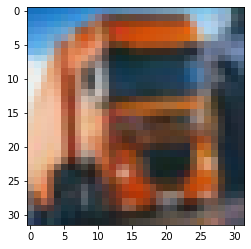

In [5]:
imshow(torchvision.utils.make_grid(truck_tensor))

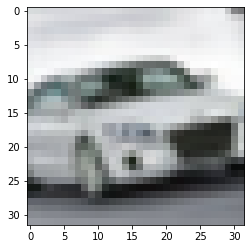

In [6]:
imshow(torchvision.utils.make_grid(auto_tensor))

In [7]:
# pre-trained mobilenet_v3 binary classification model : automobile vs truck
net = models.mobilenet_v3_small(pretrained=False)
net.classifier[3] = nn.Linear(1024, 2)

In [8]:
net.load_state_dict(torch.load('cifar_net.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [9]:
net.eval()
auto_out = net(auto_tensor)
truck_out = net(truck_tensor)

In [10]:
print(auto_out)
print(truck_out)

tensor([[ 3.3750, -2.1186]], grad_fn=<AddmmBackward>)
tensor([[-4.0732,  1.8952]], grad_fn=<AddmmBackward>)


In [11]:
Softmax = nn.Softmax(dim=1)

In [12]:
Softmax(auto_out)

tensor([[0.9959, 0.0041]], grad_fn=<SoftmaxBackward>)

In [13]:
Softmax(truck_out)

tensor([[0.0026, 0.9974]], grad_fn=<SoftmaxBackward>)

In [14]:
def dot(tensor):
    x, y = Softmax(tensor).detach().numpy()[0]
    return x, y

In [15]:
x_list=[];y_list=[]
soft_x=[];soft_y=[]

In [16]:
x1, y1 = dot(auto_out)
soft_x.append(x1)
soft_y.append(y1)
x2, y2 = dot(truck_out)
soft_x.append(x2)
soft_y.append(y2)

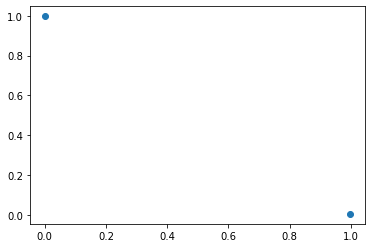

In [17]:
%matplotlib inline
fig = plt.figure()
plt.scatter(soft_x, soft_y)
# plt.show()

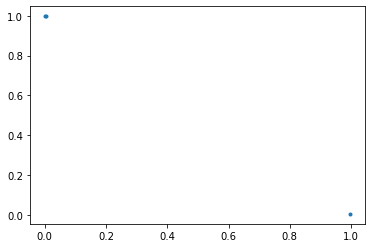

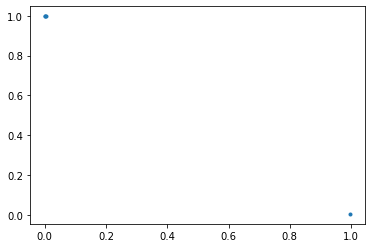

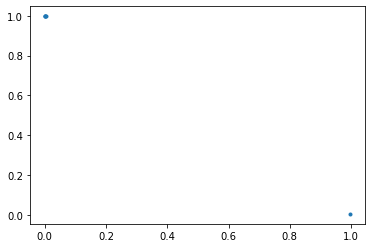

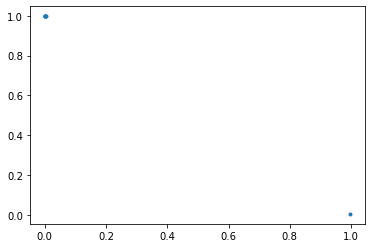

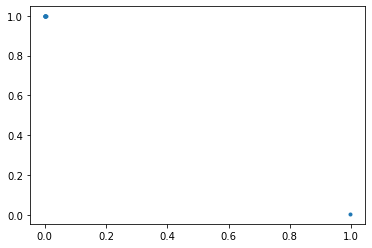

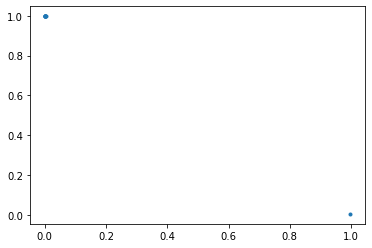

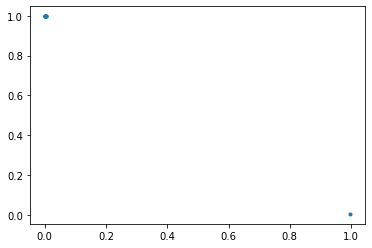

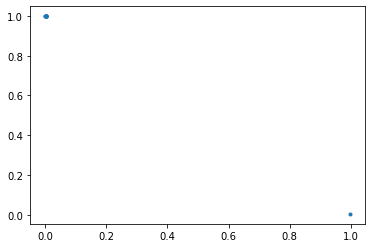

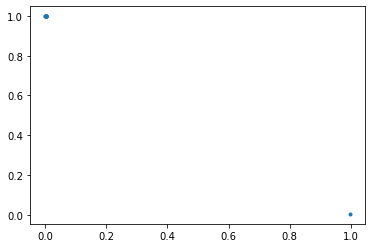

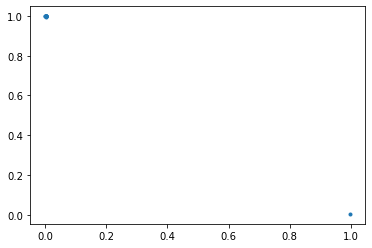

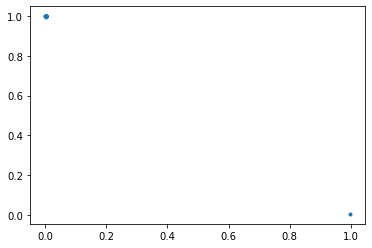

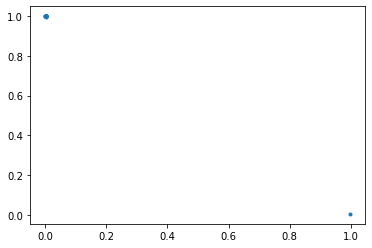

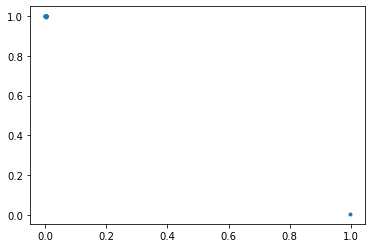

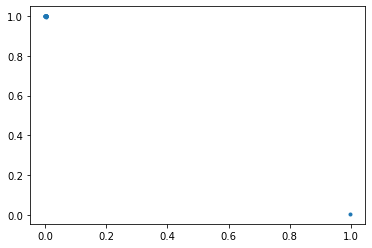

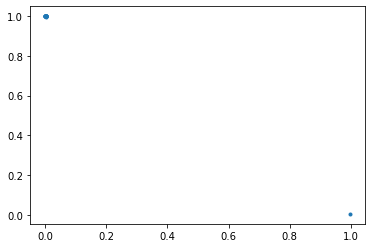

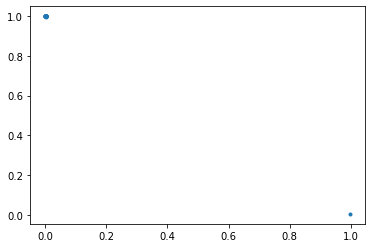

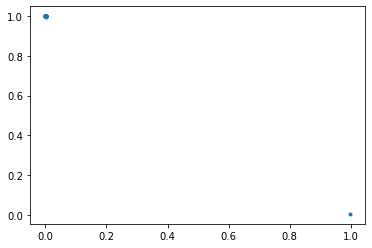

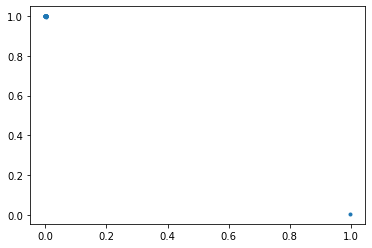

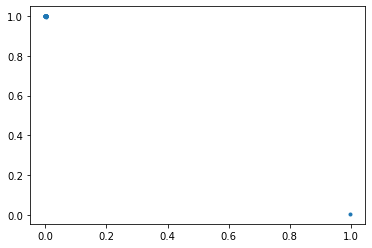

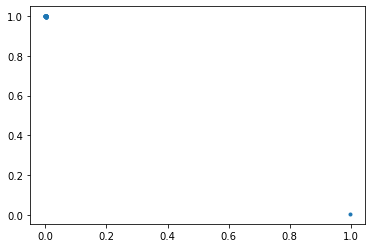

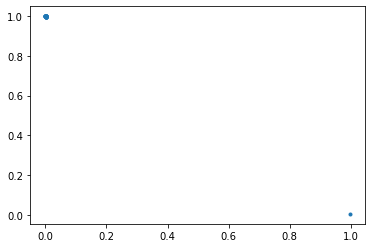

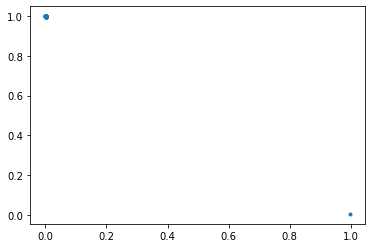

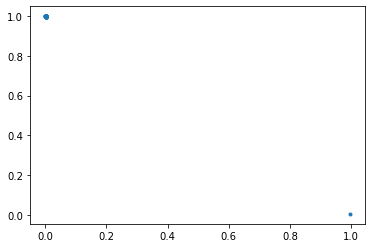

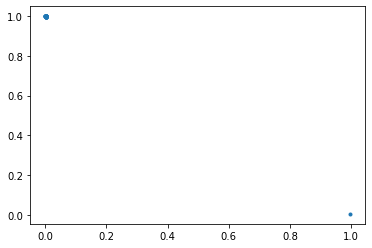

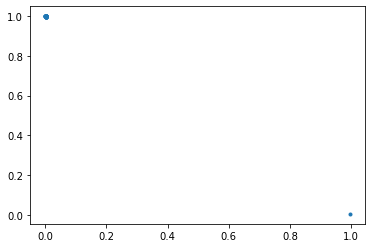

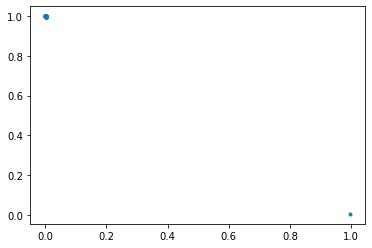

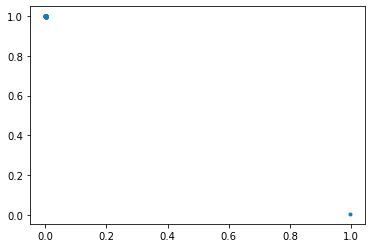

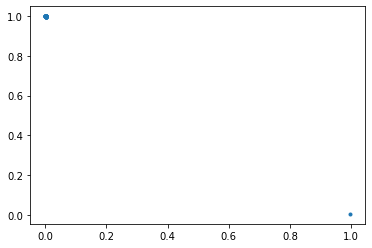

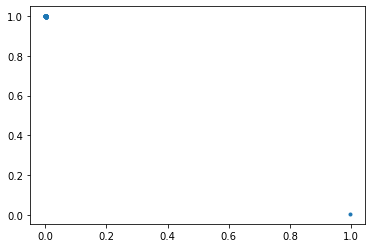

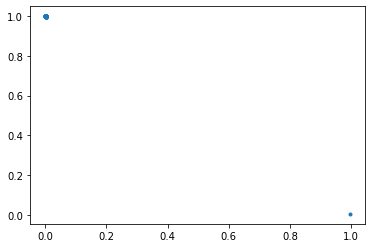

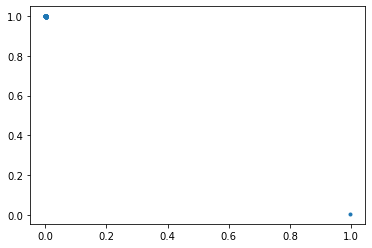

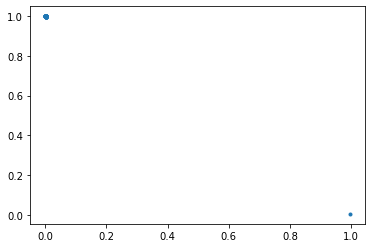

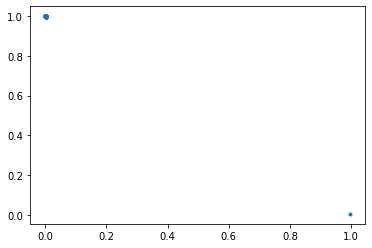

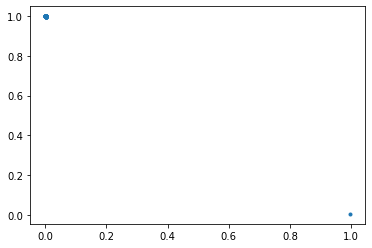

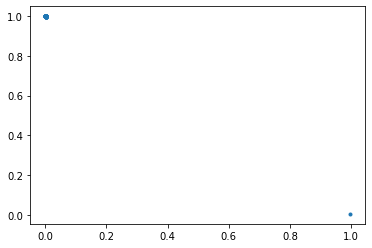

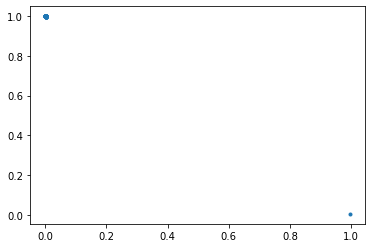

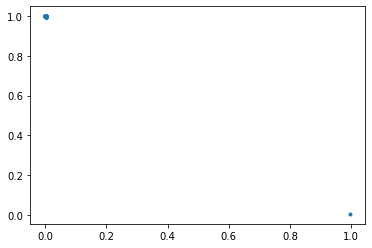

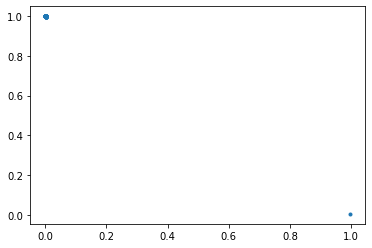

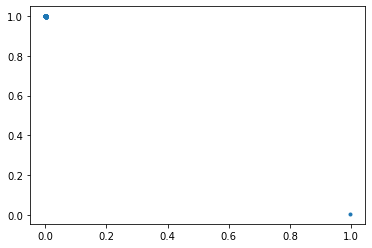

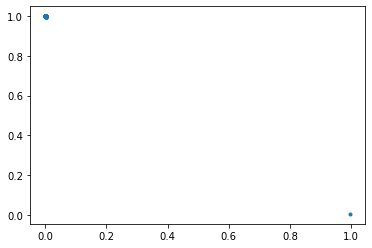

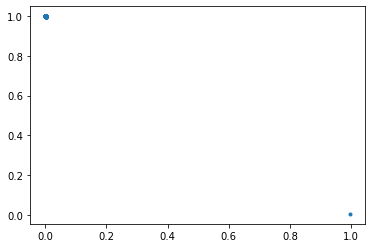

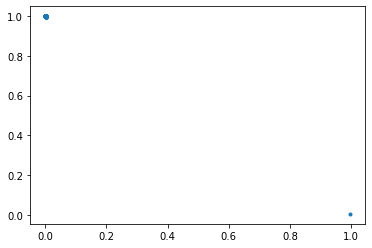

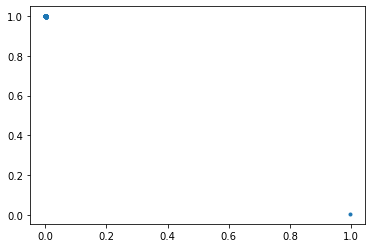

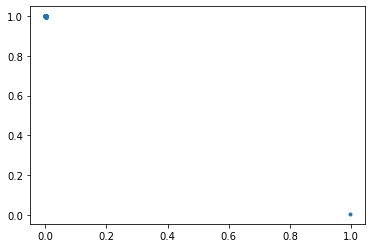

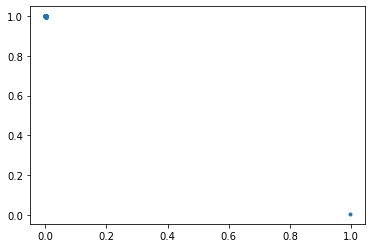

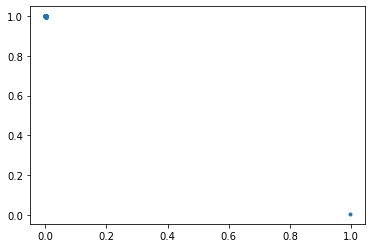

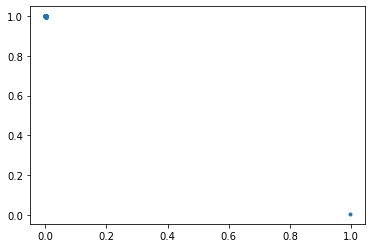

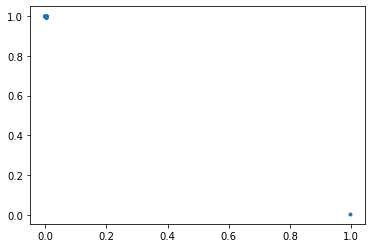

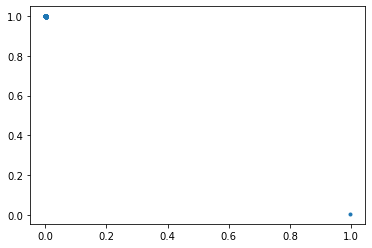

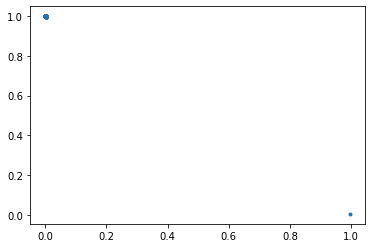

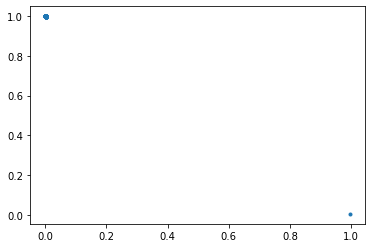

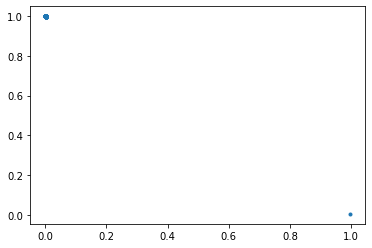

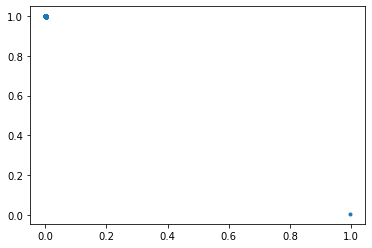

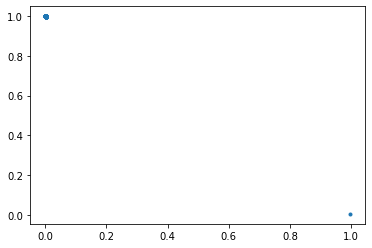

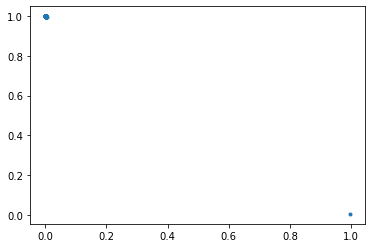

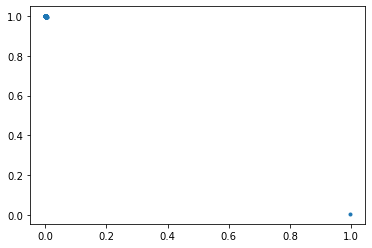

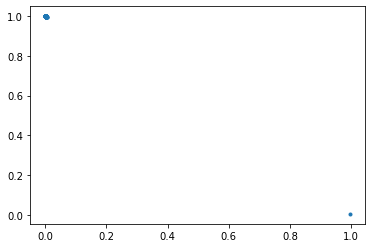

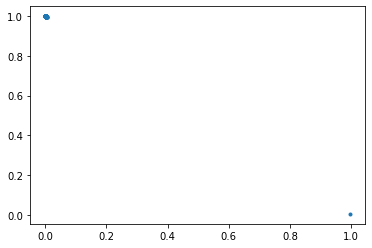

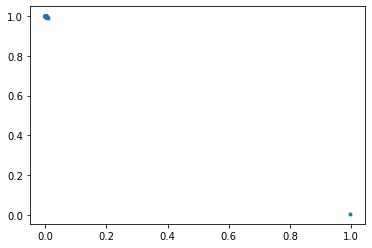

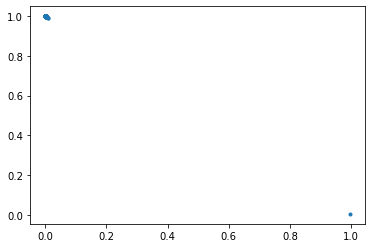

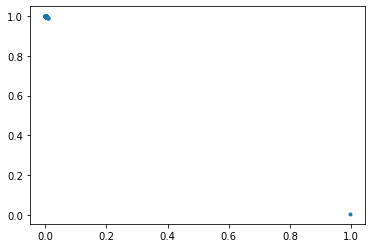

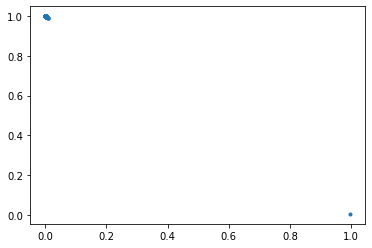

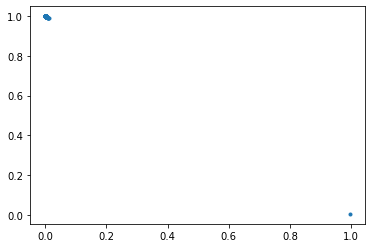

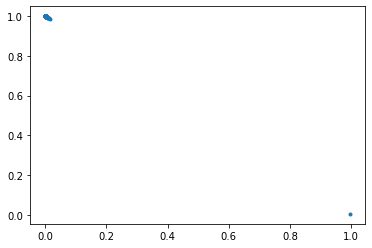

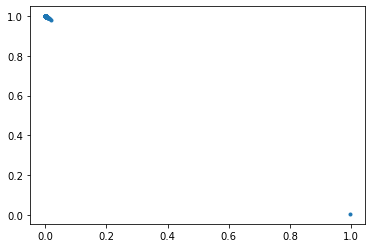

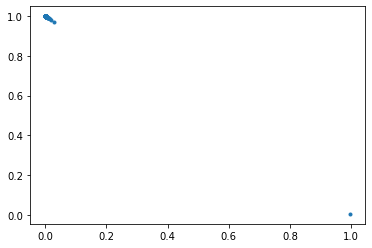

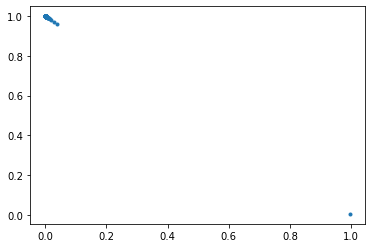

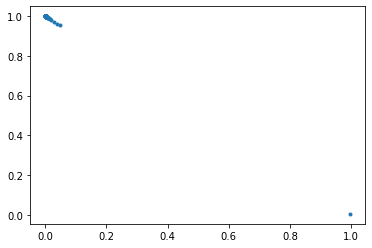

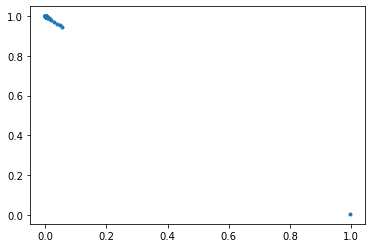

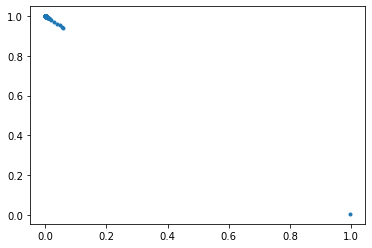

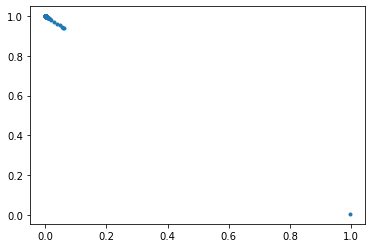

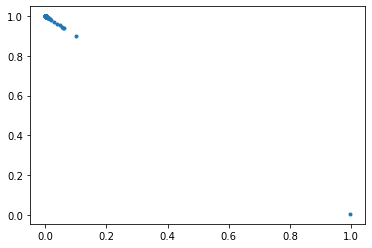

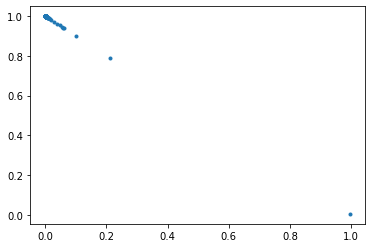

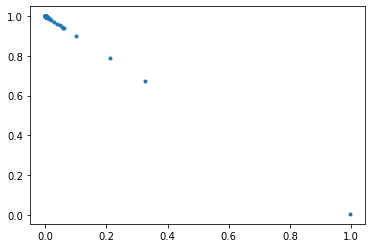

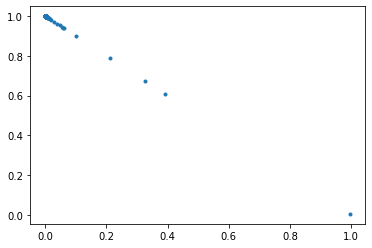

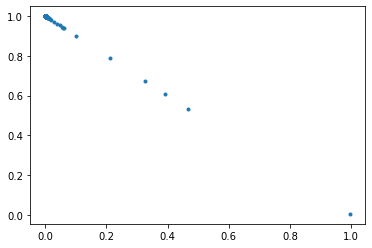

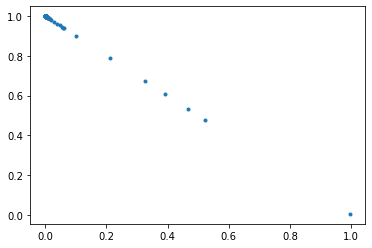

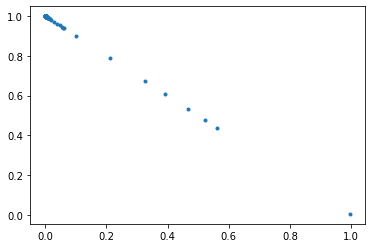

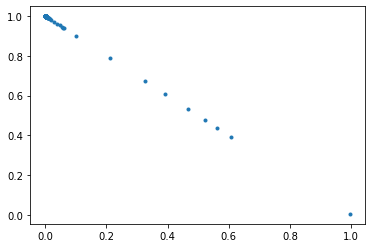

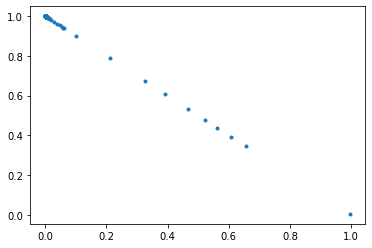

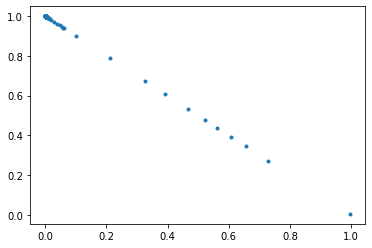

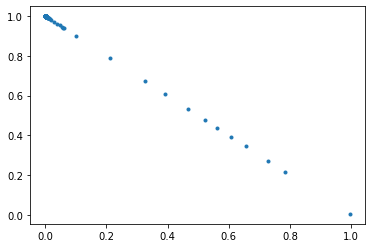

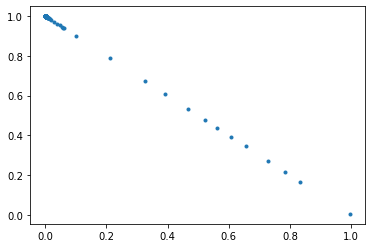

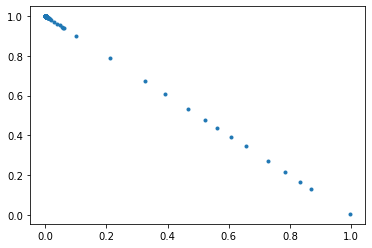

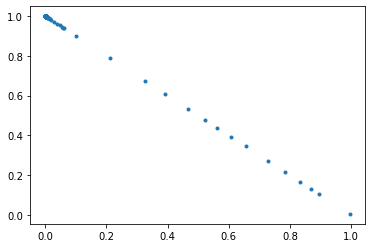

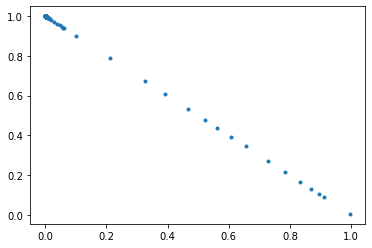

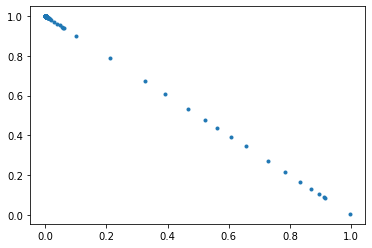

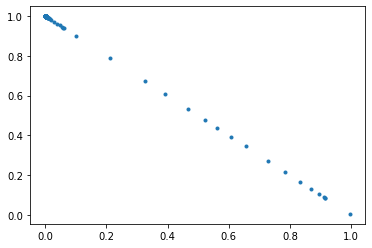

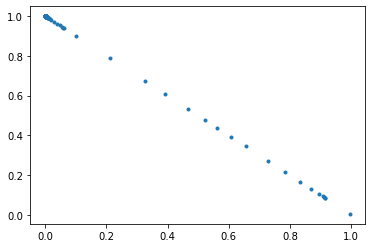

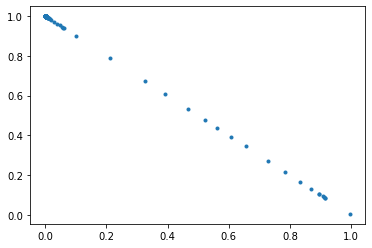

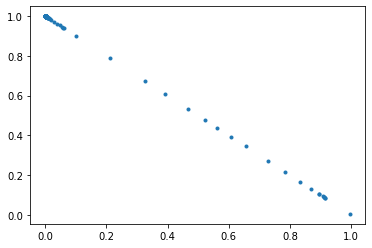

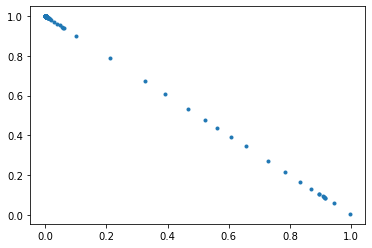

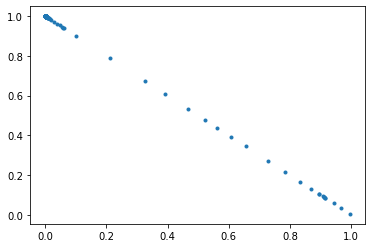

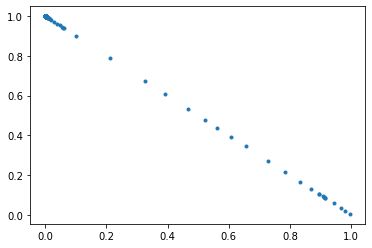

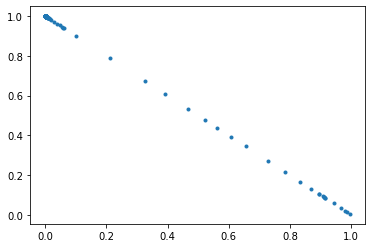

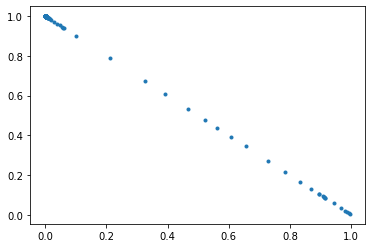

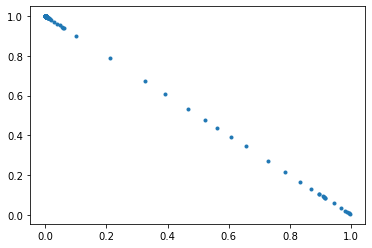

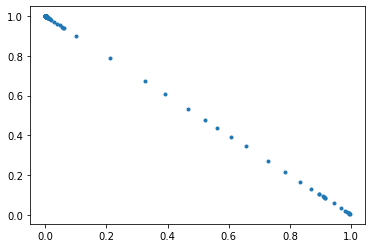

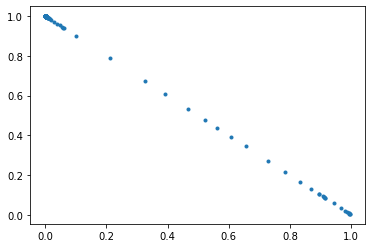

In [18]:
range_scale=100
for interpolant in range(1, range_scale):
    mixed_tensor = interpolant/range_scale * auto_tensor + (1 - interpolant/range_scale) * truck_tensor
    with torch.no_grad():
        out = net(mixed_tensor)
#     x, y = dot(out)
    x, y = Softmax(out).numpy()[0]
    soft_x.append(x)
    soft_y.append(y)
    plt.scatter(soft_x, soft_y, marker='.')
    plt.show()
    x, y = out.numpy()[0]
#     x, y = Softmax(tensor).detach().numpy()[0]
    x_list.append(x)
    y_list.append(y)

<code>auto:tensor([[ 3.3750, -2.1186]],
truck:tensor([[-4.0732,  1.8952]],</code>

<function matplotlib.pyplot.show(*args, **kw)>

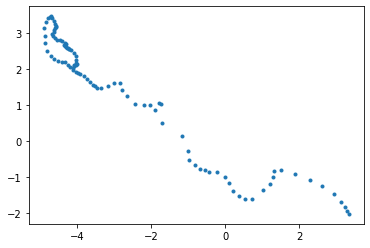

In [19]:
fig = plt.figure()
plt.scatter(x_list, y_list, marker='.')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

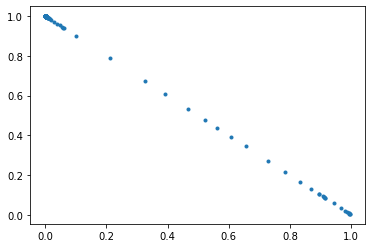

In [20]:
fig = plt.figure()
plt.scatter(soft_x, soft_y, marker='.')
plt.show

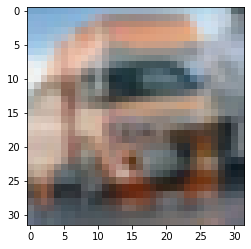

In [21]:
mixed_tensor = (truck_tensor + auto_tensor)/2
imshow(torchvision.utils.make_grid(mixed_tensor))

### Experiment 2. applied on testing images(unseen data)

In [22]:
truck_tensor = transform(Image.open('test_truck.png')).unsqueeze(0)
auto_tensor = transform(Image.open('test_auto.png')).unsqueeze(0)

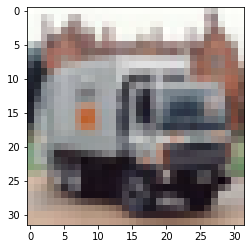

In [23]:
imshow(torchvision.utils.make_grid(truck_tensor))

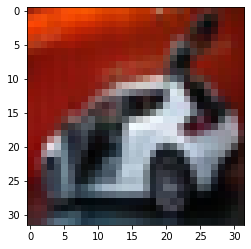

In [24]:
imshow(torchvision.utils.make_grid(auto_tensor))

In [25]:
net.eval()
auto_out = net(auto_tensor)
truck_out = net(truck_tensor)

In [26]:
x_list=[];y_list=[]
soft_x=[];soft_y=[]

In [27]:
x1, y1 = dot(auto_out)
soft_x.append(x1)
soft_y.append(y1)
x2, y2 = dot(truck_out)
soft_x.append(x2)
soft_y.append(y2)

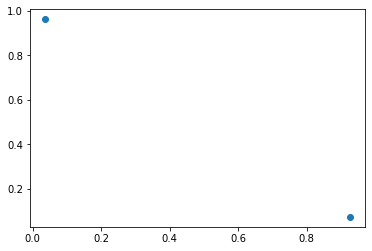

In [28]:
%matplotlib inline
fig = plt.figure()
plt.scatter(soft_x, soft_y)
# plt.show()

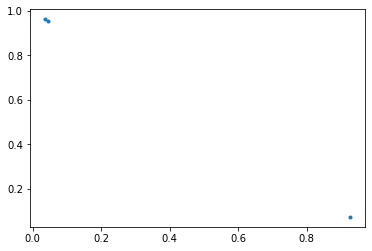

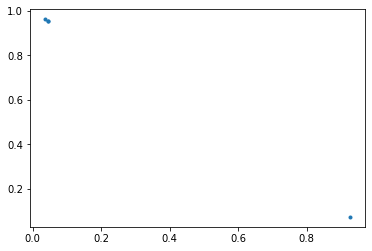

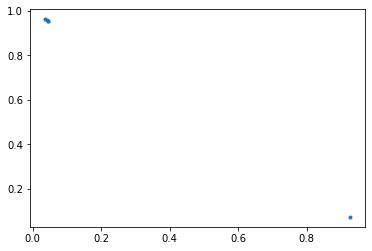

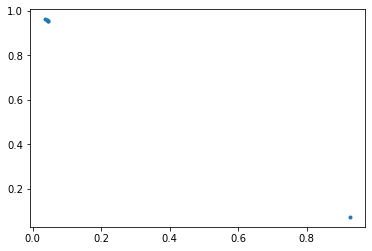

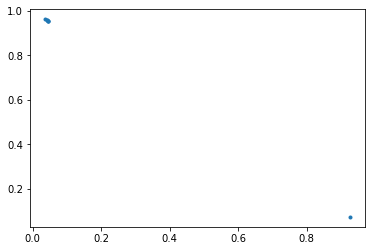

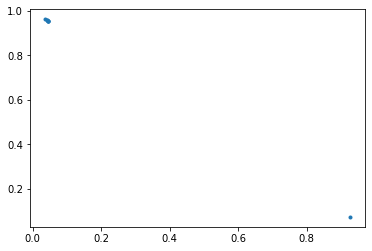

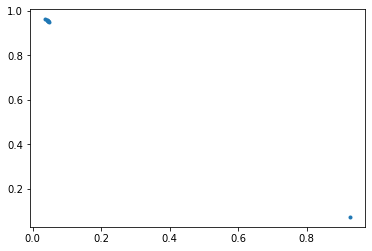

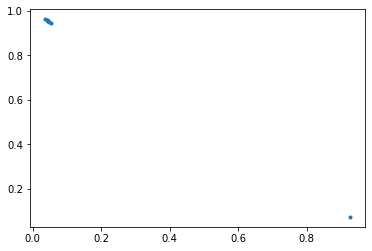

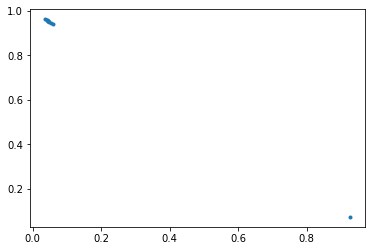

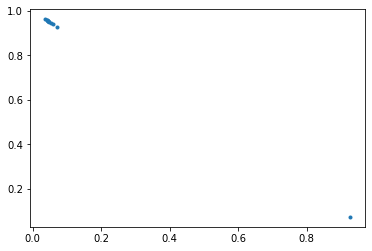

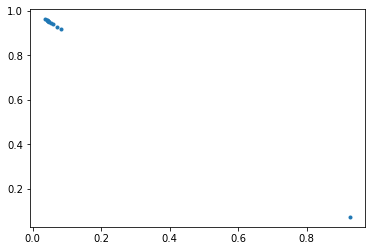

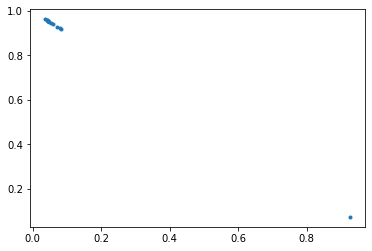

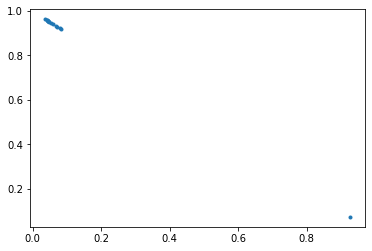

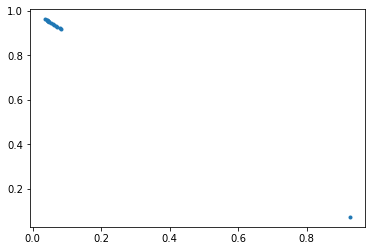

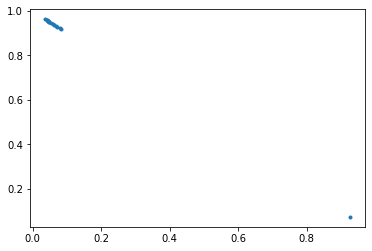

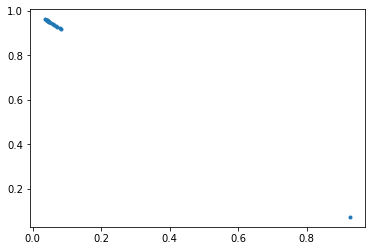

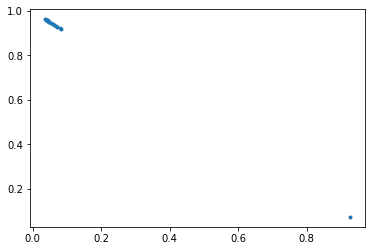

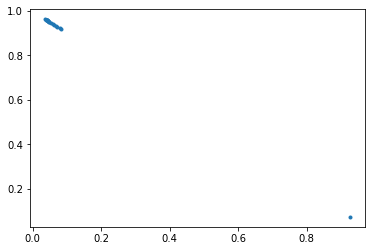

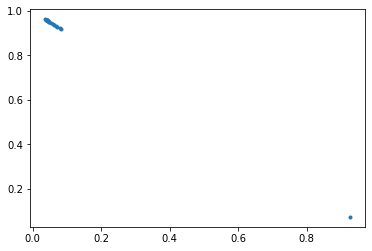

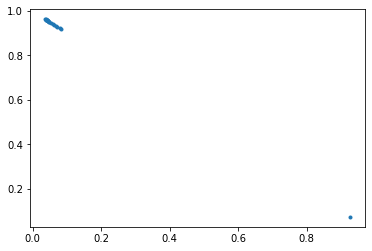

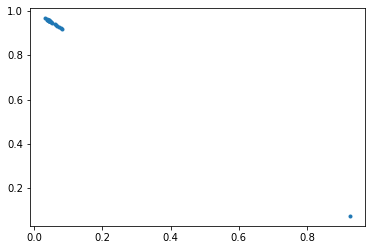

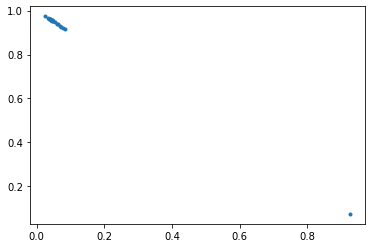

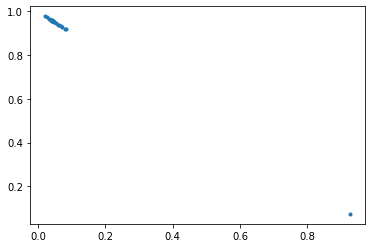

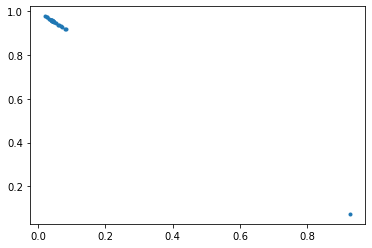

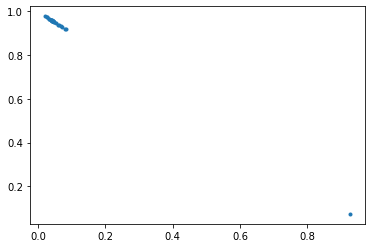

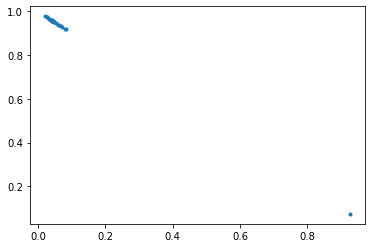

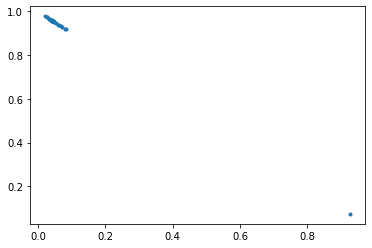

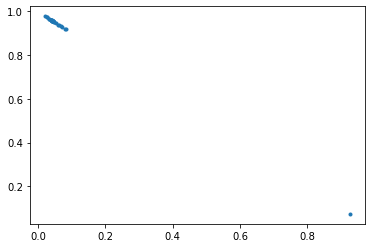

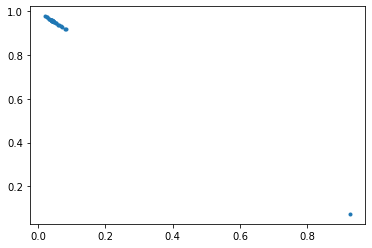

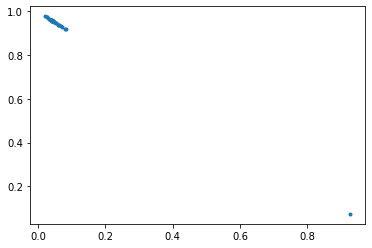

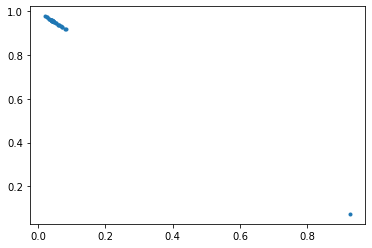

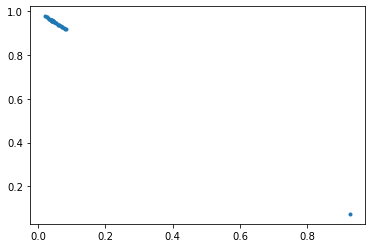

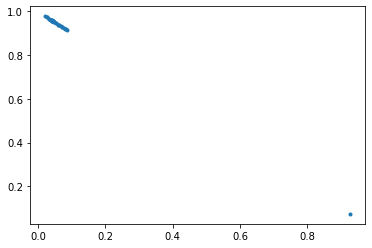

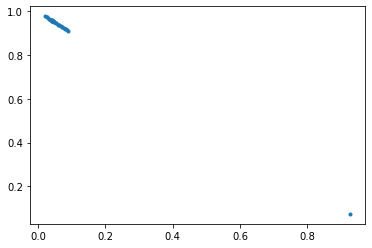

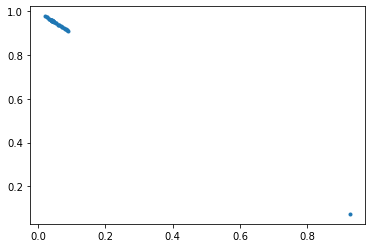

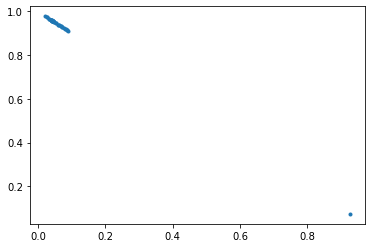

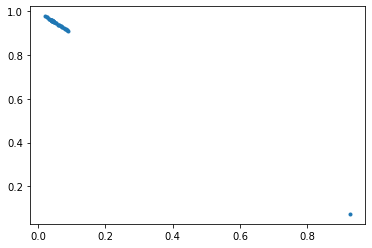

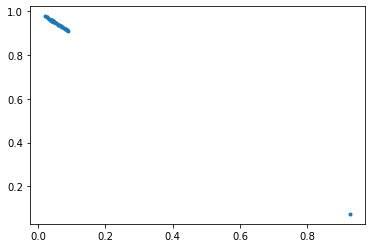

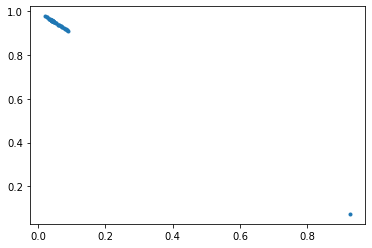

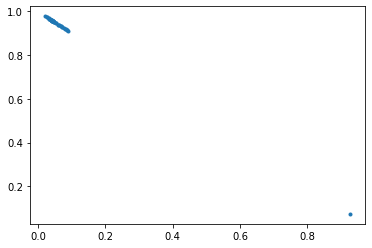

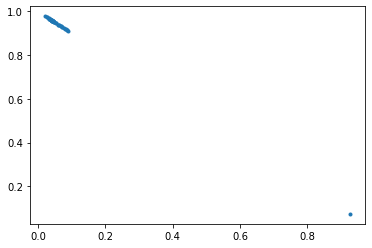

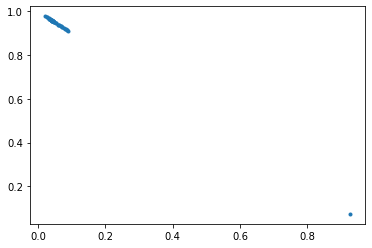

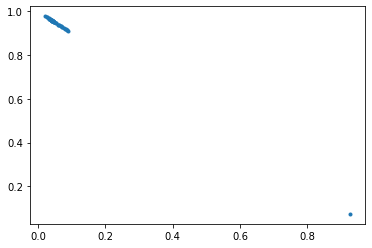

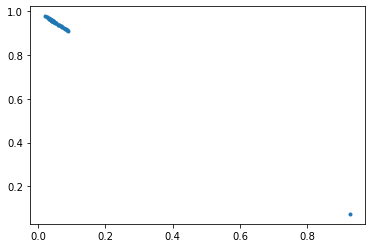

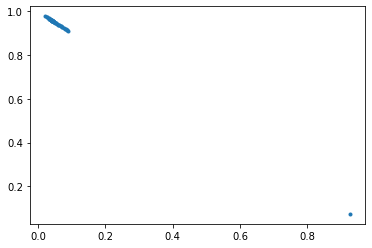

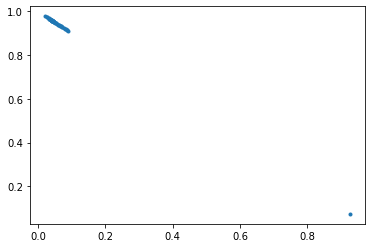

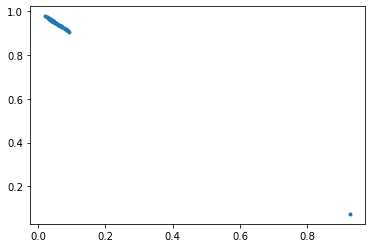

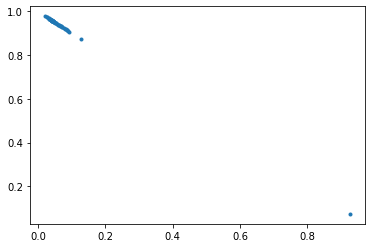

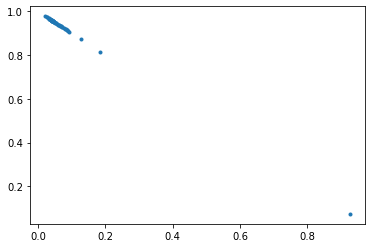

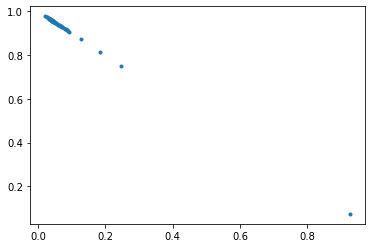

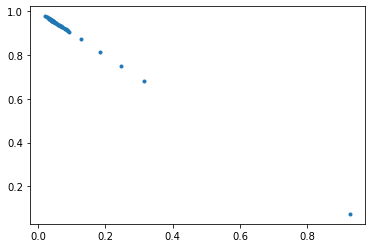

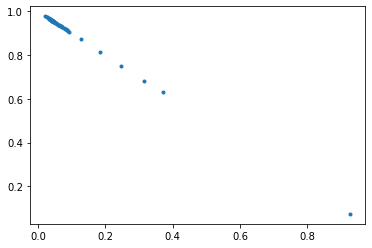

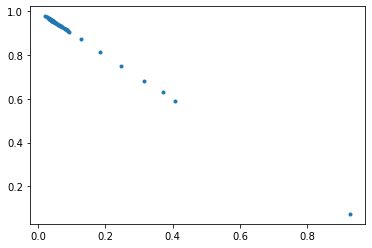

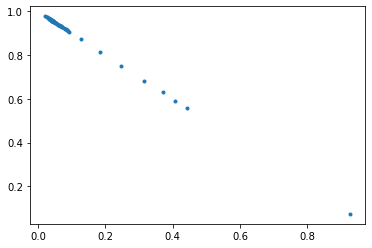

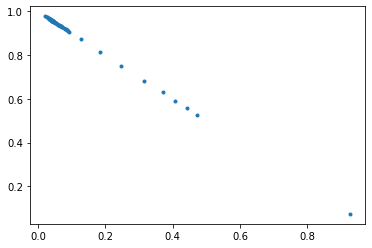

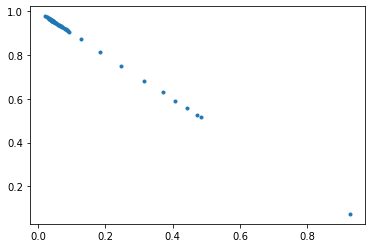

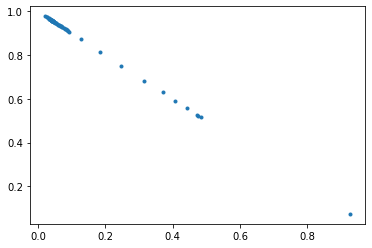

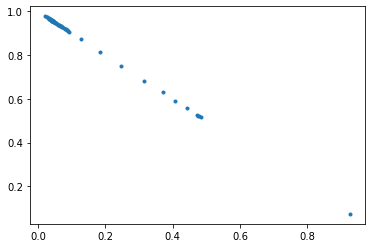

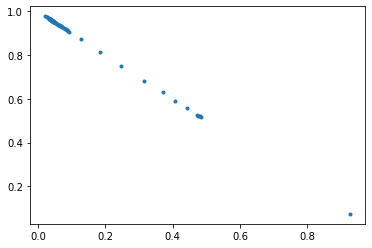

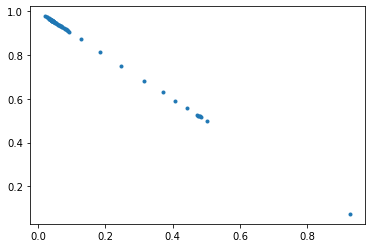

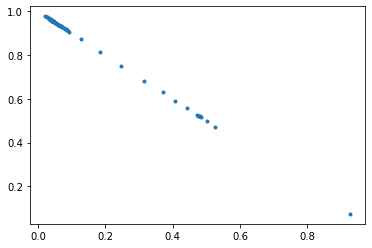

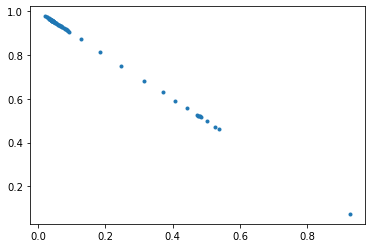

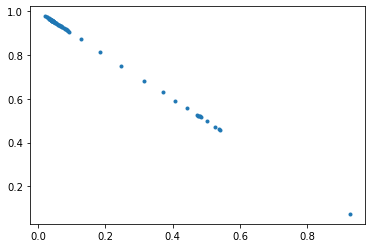

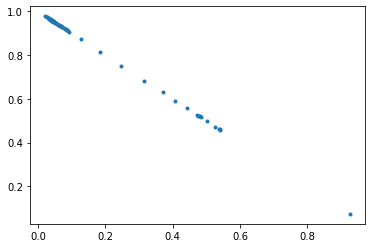

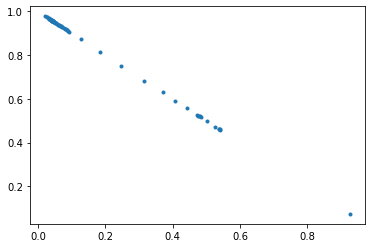

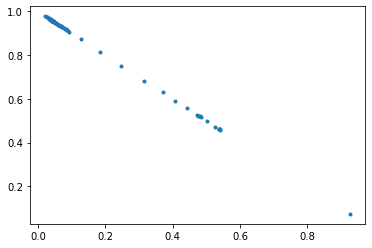

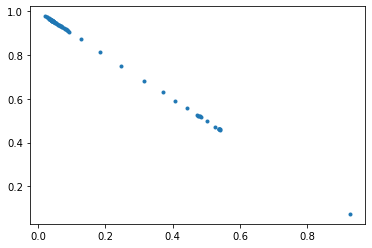

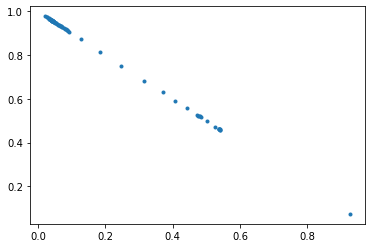

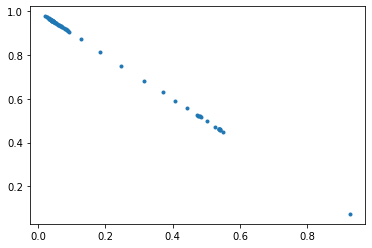

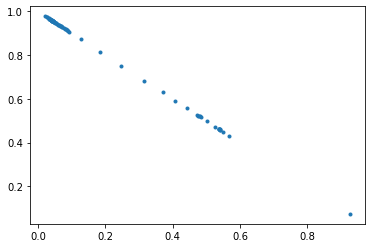

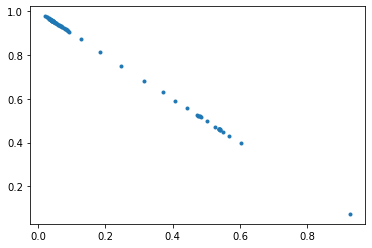

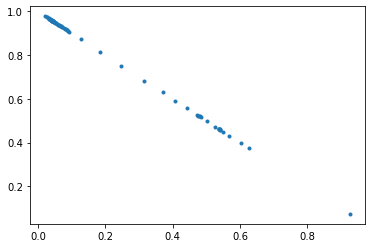

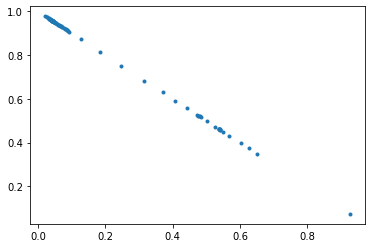

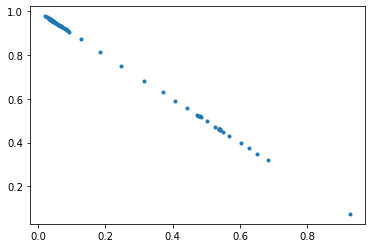

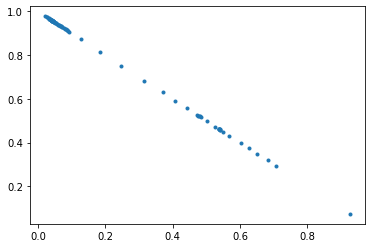

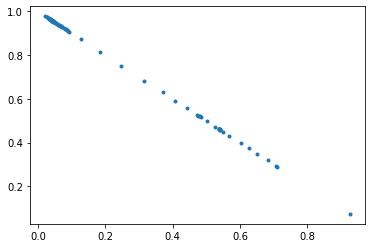

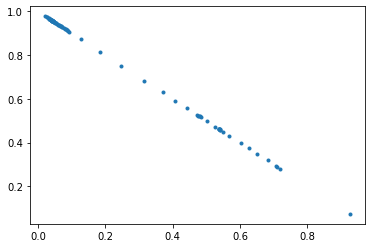

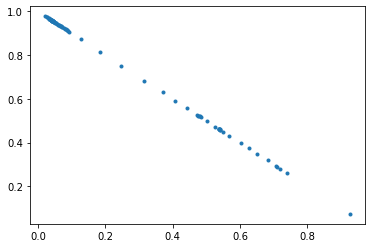

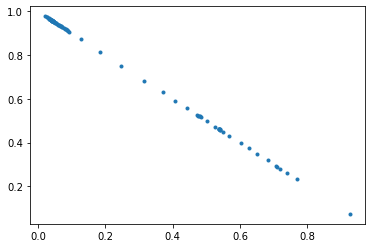

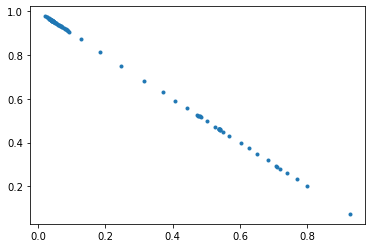

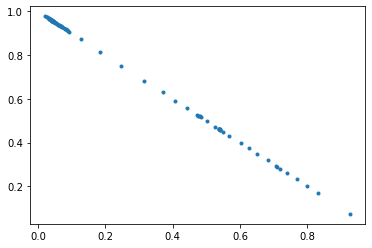

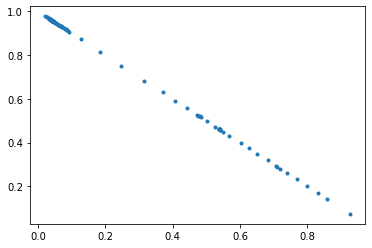

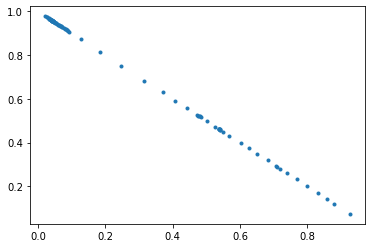

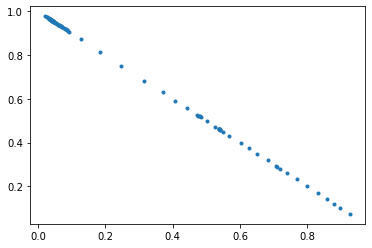

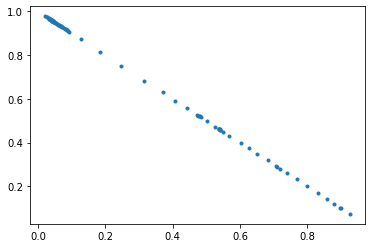

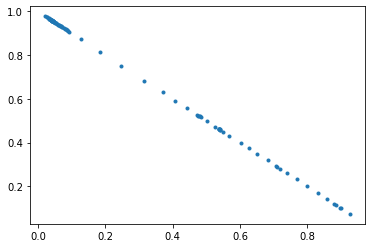

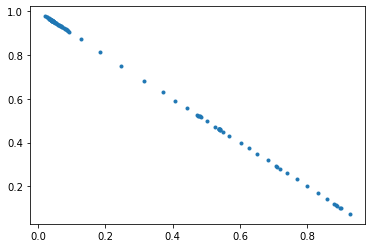

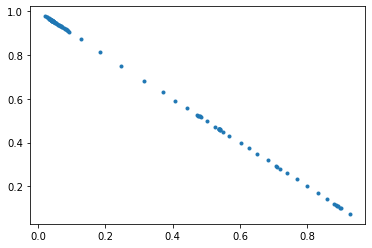

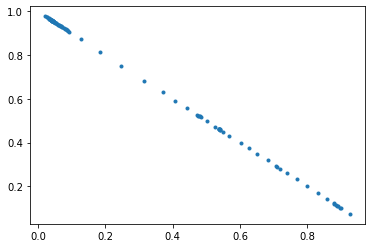

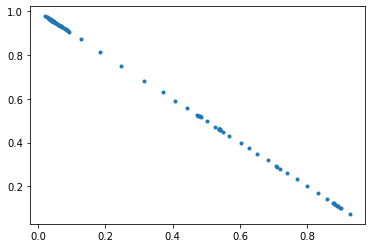

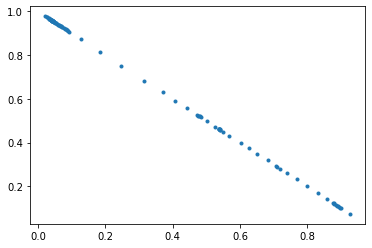

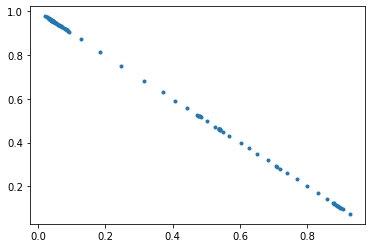

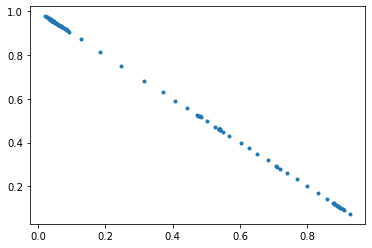

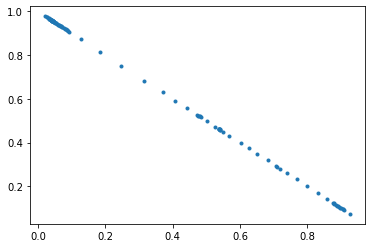

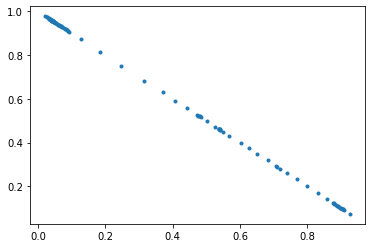

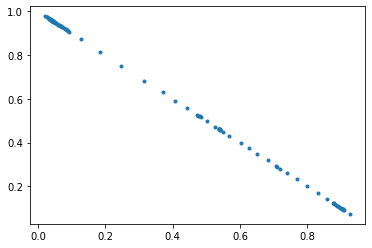

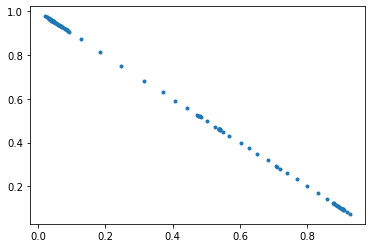

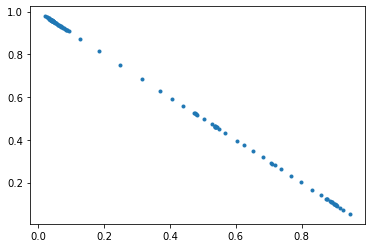

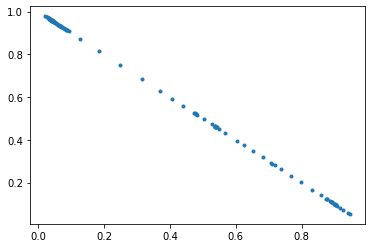

In [29]:
range_scale=100
for interpolant in range(1, range_scale):
    mixed_tensor = interpolant/range_scale * auto_tensor + (1 - interpolant/range_scale) * truck_tensor
    with torch.no_grad():
        out = net(mixed_tensor)
#     x, y = dot(out)
    x, y = Softmax(out).numpy()[0]
    soft_x.append(x)
    soft_y.append(y)
    plt.scatter(soft_x, soft_y, marker='.')
    plt.show()
    x, y = out.numpy()[0]
#     x, y = Softmax(tensor).detach().numpy()[0]
    x_list.append(x)
    y_list.append(y)

<function matplotlib.pyplot.show(*args, **kw)>

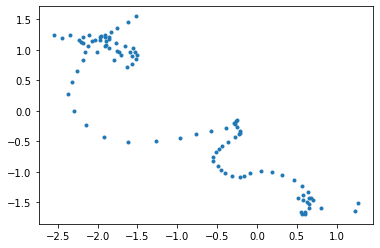

In [30]:
fig = plt.figure()
plt.scatter(x_list, y_list, marker='.')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

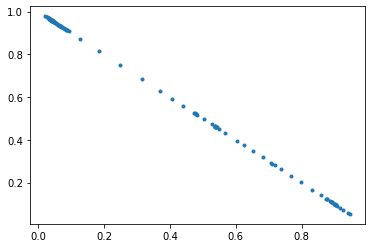

In [31]:
fig = plt.figure()
plt.scatter(soft_x, soft_y, marker='.')

plt.show

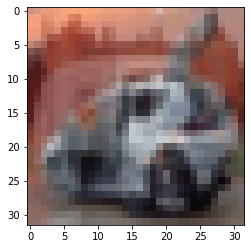

In [32]:
mixed_tensor = (truck_tensor + auto_tensor)/2
imshow(torchvision.utils.make_grid(mixed_tensor))